# ２次関数のフィッティング

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import torch

N = 100 # 入力層の次元
M = 500 # 隠れ層の次元

np.random.seed(123)
x = np.random.randn(N)
y = x ** 2 + np.random.randn(N) * 0.1

x = torch.tensor(x).float()
y = torch.tensor(y).float()

x_train = x[:N // 2].view(-1, 1).float()
x_test  = x[N // 2:].view(-1, 1).float()
y_train = y[:N // 2].view(-1, 1).float()
y_test  = y[N // 2:].view(-1, 1).float()


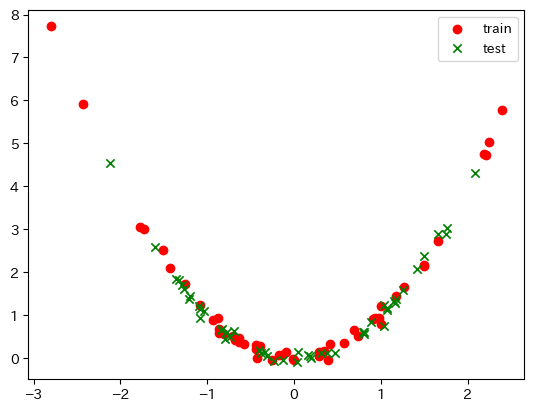

In [157]:
plt.scatter(x_train, y_train, c='r', label='train')
plt.scatter(x_test, y_test, c='g', marker='x', label='test')
plt.legend()

In [158]:
from torch import nn

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        relu = nn.ReLU(inplace=True)
        # これがレイヤー関数
        self.net = nn.Sequential(
            nn.Linear(n_input, M),
            relu,
            nn.Linear(M, n_output),
            relu,
        )
    def forward(self, x):
        return self.net(x)

net = Net(1, 1)

outputs = net(x_train)


In [159]:
for param in net.named_parameters():
    print(param)

('net.0.weight', Parameter containing:
tensor([[-0.4527],
        [-0.6555],
        [-0.6061],
        [ 0.7280],
        [ 0.5138],
        [-0.7968],
        [-0.9282],
        [-0.6264],
        [-0.6855],
        [-0.8319],
        [ 0.9374],
        [ 0.2827],
        [ 0.8732],
        [-0.5781],
        [ 0.3566],
        [-0.0252],
        [ 0.1454],
        [-0.3668],
        [-0.4180],
        [ 0.2718],
        [ 0.5268],
        [ 0.0783],
        [-0.3788],
        [ 0.5672],
        [-0.2534],
        [ 0.5184],
        [ 0.6754],
        [-0.4243],
        [ 0.5310],
        [ 0.8380],
        [ 0.2127],
        [ 0.6165],
        [-0.0160],
        [-0.7393],
        [-0.5574],
        [ 0.5942],
        [-0.4312],
        [-0.4975],
        [ 0.4706],
        [ 0.6027],
        [-0.7540],
        [-0.4933],
        [ 0.9795],
        [-0.4537],
        [-0.1922],
        [-0.5014],
        [ 0.9886],
        [ 0.5667],
        [-0.2249],
        [-0.2436],
        [-0

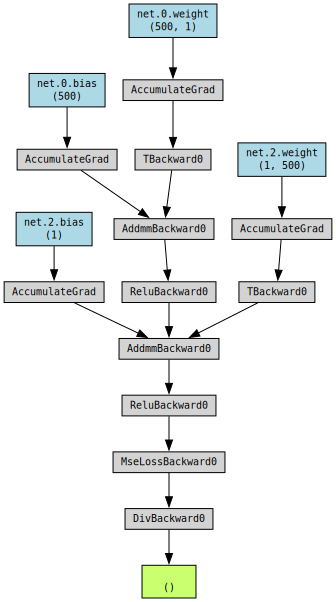

In [160]:
criterion = nn.MSELoss().float()

loss = criterion(outputs, y_train) / 2.0

from torchviz import make_dot
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)


In [161]:
loss.backward()

In [162]:
import torch.optim as optim

lr = 0.001
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

optimizer.step()
optimizer.zero_grad()

In [163]:
num_epochs = 1000

history = np.array((0, 2))
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(x_train)
    loss = criterion(outputs, y_train) / 2.0
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 200 == 0:
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch / Loss = {epoch} / {loss.item():.5f}')


Epoch / Loss = 0 / 2.02160
Epoch / Loss = 200 / 0.02269
Epoch / Loss = 400 / 0.01793
Epoch / Loss = 600 / 0.01387
Epoch / Loss = 800 / 0.01170


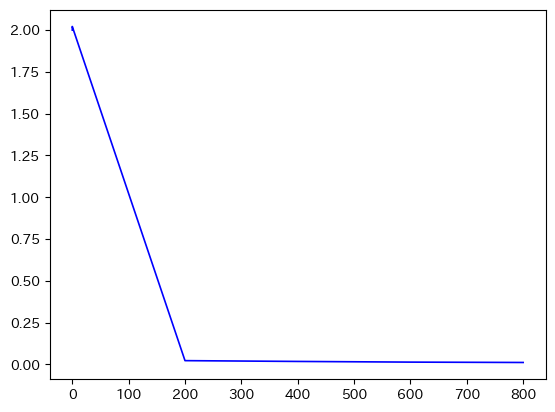

In [164]:
plt.plot(history[:, 0], history[:, 1], 'b')

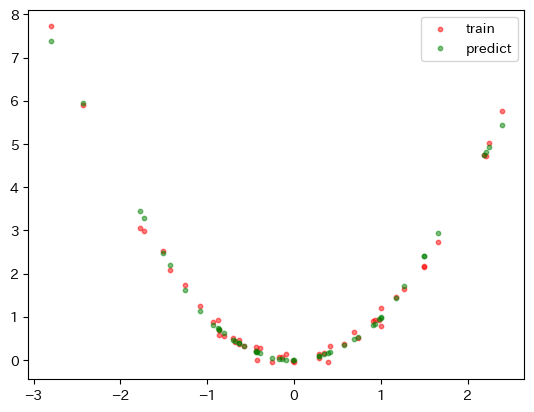

In [165]:
plt.scatter(x_train.data.numpy(), y_train.data.numpy(), c='r', s=10, label='train', alpha=0.5)
plt.scatter(x_train.data.numpy(), net(x_train).data.numpy(), c='g', s=10, label='predict', alpha=0.5)
plt.legend()

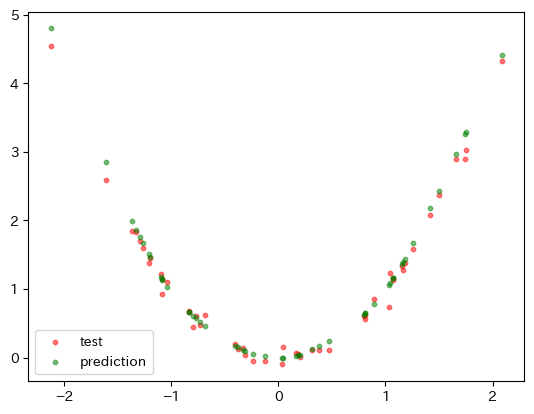

In [166]:
plt.scatter(x_test.data.numpy(), y_test.data.numpy(), c='r', s=10, label='test', alpha=0.5)
plt.scatter(x_test.data.numpy(), net(x_test).data.numpy(), c='g', s=10, label='prediction', alpha=0.5)
plt.legend()